# Importando as bibliotecas necessárias

In [8]:
import pandas as pd
import numpy as np
import somoclu
from sklearn.cluster import KMeans

%matplotlib inline

# Importando os dados do arquivo csv

- Each row is a separate image
- 785 columns
- First column = class_label (see mappings.txt for class label definitions)
- Each column after represents one pixel value (784 total for a 28 x 28 image)

![img](https://imgur.com/MJo1Kd0.jpg)


In [9]:
df = pd.read_csv(
    filepath_or_buffer='emnist-letters-train.csv', 
    header=None, 
    sep=',')

df[0,0]

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualizando os dados completos

In [10]:
import warnings
warnings.filterwarnings('ignore')

dfa = df.ix[df.iloc[:,0] == 1]
dfe = df.ix[df.iloc[:,0] == 21]
#dfi = df.ix[df.iloc[:,0] == 9]
#dfo = df.ix[df.iloc[:,0] == 15]
#dfu = df.ix[df.iloc[:,0] == 21]
#iris.ix[iris.iloc[,:0] >= 7,] 
df = [dfa,dfe]

df = pd.concat(df)
df


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
29,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
224,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
N = 6833
x_train = df.values
#df = df[:,1:len(df)]
x_train = x_train[:,1:len(df)]

x_train[0,:]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   4,   4,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   8,  46, 125, 113,  34,
         3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   1,  33, 126, 208, 249,
       243, 175,  67,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   5,  47, 163, 244,
       254, 254, 254, 250, 170,  21,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  47, 195,
       247, 254, 250, 227, 247, 254, 216,  38,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

# Usando o Somoclu para impementar a SOM

In [47]:
n_rows, n_columns = 15, 15
som = somoclu.Somoclu(n_columns, n_rows,initialization="random",maptype="toroid",compactsupport=False)
%time som.train(data=x_train)

CPU times: user 26.8 s, sys: 88 ms, total: 26.9 s
Wall time: 3.68 s


In [36]:
#som.cluster(algorithm=KMeans(n_clusters=2))

In [48]:
colors = ["red"] * 2*N
colors.extend(["green"] * 2*N)
colors.extend(["blue"] * 2*N)
labels = range(N)

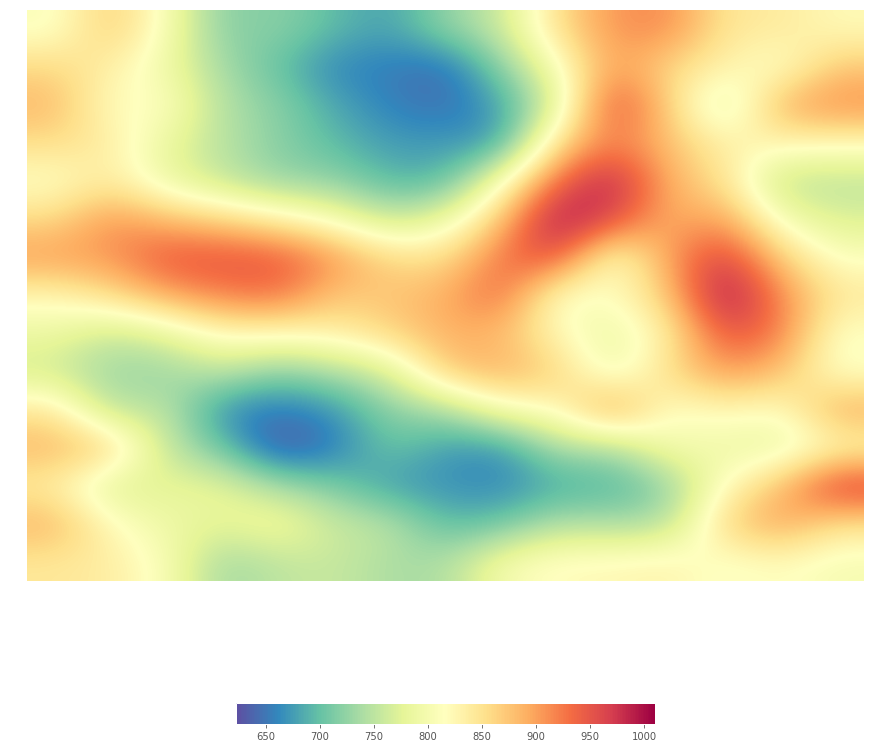

<module 'matplotlib.pyplot' from '/home/iagodiogenes/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [49]:
som.view_umatrix(figsize=((15,15)),colorbar=True)
#som.view_similarity_matrix()